In [2]:
import matplotlib.pyplot as plt
import os, pickle
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
path = './sweep_results/'

i = 9
baseline = pd.read_csv(path+f'sweep_baseline_v2_v4_seeds{i}.csv')

proposed_all = pd.DataFrame()

for i in range(10):
    df = pd.read_csv(path+f'sweep_proposed_v2_fixscaleseed{i}.csv')
    df['seed'] = i
    proposed_all = pd.concat([proposed_all, df])

baseline.loc[baseline['approach'] == 'multisource uniform', 'approach'] = 'Avg-ERM'
baseline.loc[baseline['approach'] == 'multisource cat', 'approach']     = 'Cat-ERM'
baseline.loc[baseline['approach'] == 'multisource simple aadapt', 'approach']     = 'SA'


oracle = baseline[baseline['approach'] == 'ERM'][['approach', 'target -> target', 'pU=0', 'seed']]
oracle.loc[oracle['approach']=='ERM', 'approach'] = 'ORACLE'
oracle = oracle.rename(columns={'target -> target': 'MSE'})

baseline = baseline.drop('source -> source', axis = 1)
baseline = baseline.drop('target -> target', axis = 1)
baseline = baseline.drop('target -> source', axis = 1)
baseline = baseline.rename(columns={'source -> target': 'MSE'})


proposed_all.loc[proposed_all['task'] == 'adaptation', 'task'] = 'Proposed' 




all_summary = proposed_all[proposed_all['task'] == 'Proposed']
all_summary = all_summary.rename(columns={'predict error.l2': 'MSE', 'task':'approach'})
all_summary = all_summary.drop('env_id', axis=1)

all_summary = pd.concat([all_summary, baseline, oracle])

In [3]:
all_summary

,approach,MSE,pU=0,seed
5,Proposed,0.653465,0.1,0
11,Proposed,0.795916,0.2,0
17,Proposed,0.910095,0.3,0
23,Proposed,0.969069,0.4,0
29,Proposed,0.987278,0.5,0
...,...,...,...,...
510,ORACLE,0.999333,0.5,9
516,ORACLE,0.941019,0.6,9
522,ORACLE,0.841808,0.7,9
528,ORACLE,0.684719,0.8,9


ValueError: Could not interpret value `target -> target` for `y`. An entry with this name does not appear in `data`.

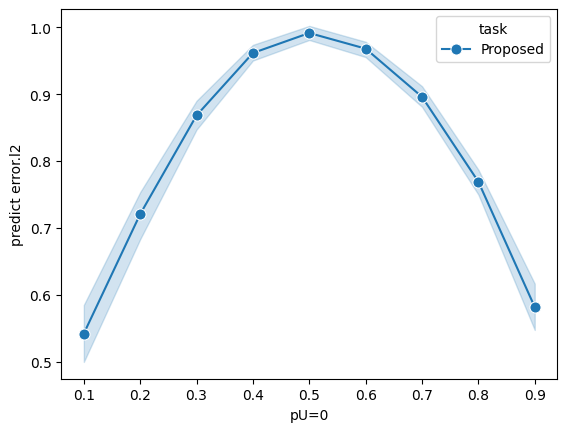

In [4]:
format_set = [
    {'color': 'black', 'linestyle': 'dashdot', 'marker': 's' },
    {'color': 'grey', 'linestyle': 'dashdot', 'marker': '^' },
    {'color': '#b31529', 'linestyle': 'solid', 'marker': '.'},
    {'color': '#d75f4c', 'linestyle': 'solid', 'marker': 'd'},
    {'color': 'darkorange', 'linestyle': 'solid', 'marker': 'x'},
    {'color': 'gold', 'linestyle': 'solid', 'marker': 'o'},
    {'color': '#8ec3de', 'linestyle': 'solid', 'marker': '+'},
    {'color': '#1065ab', 'linestyle': 'solid', 'marker': '8'}
]




g = sns.lineplot(data=proposed_all[proposed_all['task'] == 'Proposed'].sort_values(by=['pU=0']), x='pU=0', y='predict error.l2', hue='task',
            hue_order=['Proposed'], style='task', markers=True, markersize=8)

sns.lineplot(data=oracle[oracle['approach'] == 'ORACLE'].sort_values(by=['pU=0']), x='pU=0', y='target -> target', hue='approach',
            hue_order=['ORACLE'], style='approach', 
             markers=True, markersize=8)

sns.lineplot(data=baseline.sort_values(by=['pU=0']), x='pU=0', y='source -> target', hue='approach',
            hue_order=baseline['approach'].unique(), style='approach', 
             markers=True, markersize=8)

plt.grid()
plt.xlabel(r"$q(U=0)$", fontsize=16)
plt.ylabel('mean squared error', fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.legend(loc='upper left', fontsize=16)

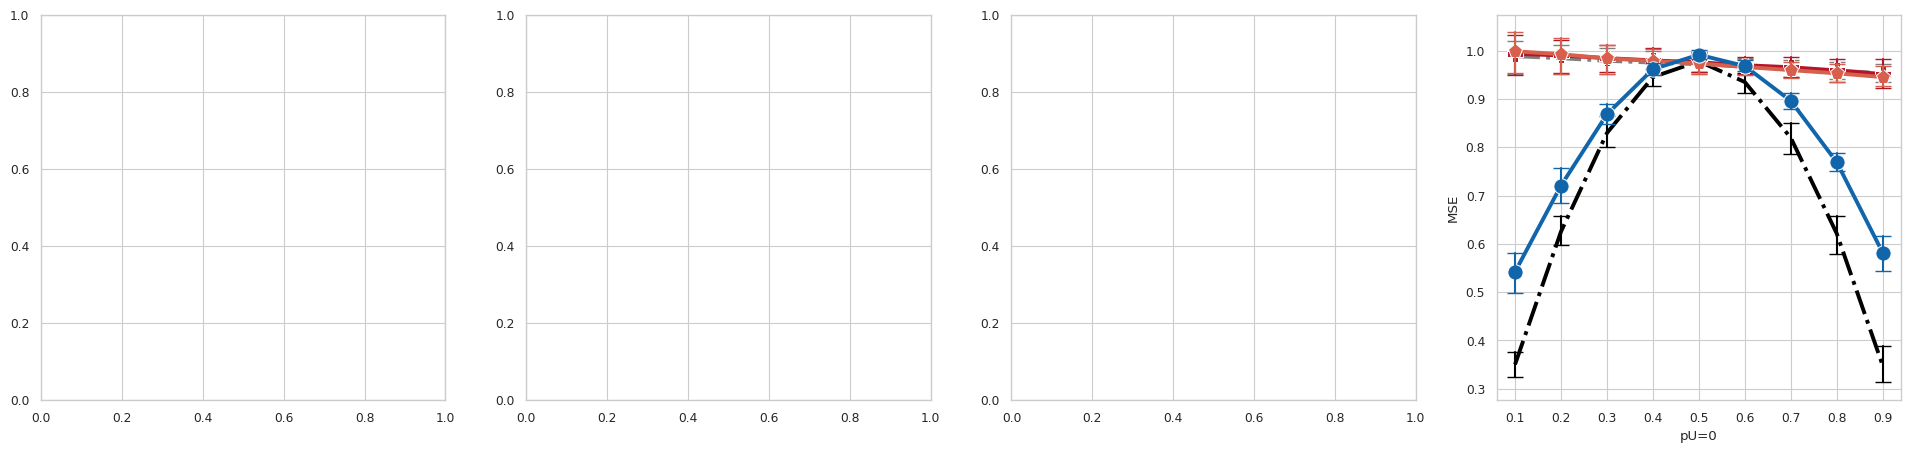

In [7]:
format_set = [
    {'color': 'black',   'linestyle': 'dashdot', 'marker': None },
    {'color': 'grey',    'linestyle': 'dashdot', 'marker': None },
    {'color': '#b31529', 'linestyle': 'solid',   'marker': 'P'},
    {'color': '#d75f4c', 'linestyle': 'solid',   'marker': 'p'},
    {'color': '#d7864c', 'linestyle': 'solid',   'marker': 'x'},
    {'color': '#3A93C3', 'linestyle': 'solid',   'marker': 'd'},
    {'color': '#1065ab', 'linestyle': 'solid',   'marker': 'o'}
]


tick_size = 18
label_size = 22
linewidth=2.8
capsize=6
markersize=11
fig, axes = plt.subplots(1, 4, figsize=(24, 5))




style_dict = {
'ORACLE':   {'line_style': format_set[0]['linestyle'], 'marker': format_set[0]['marker'], 'color':format_set[0]['color']},
#'ERM':      {'line_style': format_set[1]['linestyle'], 'marker': format_set[1]['marker'], 'color':format_set[1]['color']},
'Avg-ERM':  {'line_style': format_set[1]['linestyle'], 'marker': format_set[1]['marker'], 'color':format_set[1]['color']},
'Cat-ERM':  {'line_style': format_set[2]['linestyle'], 'marker': format_set[2]['marker'], 'color':format_set[2]['color']},
'SA':       {'line_style': format_set[3]['linestyle'], 'marker': format_set[3]['marker'], 'color':format_set[3]['color']},
'Proposed': {'line_style': format_set[6]['linestyle'], 'marker': format_set[6]['marker'], 'color':format_set[6]['color']},
}


for approach, style in style_dict.items():
    subset = all_summary[all_summary['approach'] == approach]
    sns.lineplot(data=subset.sort_values(by=['pU=0']), x='pU=0', y='MSE', label=approach, color=style['color'], ax=axes[3], legend=False,
                 linestyle=style['line_style'],err_kws={'capsize': capsize}, err_style="bars", marker=style['marker'], markersize=markersize, linewidth=linewidth)
    








In [ ]:
baseline = pd.read_csv('sweep_baseline_v2_v4_seed2.csv')
proposed = pd.read_csv('sweep_proposed_v2_seed2_fixscale_v4.csv')
baseline['approach'] = '(concat) source-target (KRR)'

sns.set(style="whitegrid")
sns.set_context("paper", rc={"lines.linewidth": 1.5})

# Create the line plot with error bars
plt.figure(figsize=(10, 6))


g = sns.lineplot(data=proposed.sort_values(by=['pU=0']), x='pU=0', y='predict error.l2', hue='task',
            hue_order=['source-target', 'target-target', 'adaptation'], style='task',
             markers=True, markersize=8)

sns.lineplot(data=baseline.sort_values(by=['pU=0']), x='pU=0', y='source -> target', hue='approach',
            hue_order=['(concat) source-target (KRR)'], style='approach', palette=['r'],
             markers=True, markersize=8)


plt.xlabel(r"$q(U=0)$", fontsize=16)
plt.ylabel('mean squared error', fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper left', fontsize=16)

plt.savefig('result_sim2_v4.png')

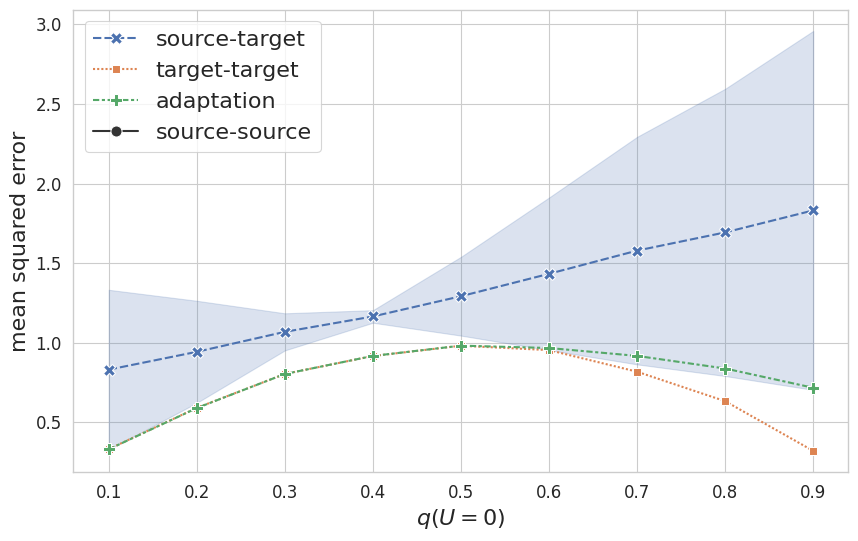

In [5]:
#baseline = pd.read_csv('sweep_baseline_v2_v4_seed2.csv')
proposed = pd.read_csv('sweep_proposed_v2_seed2_n4000_fixscale_v4.csv')
#baseline['approach'] = '(concat) source-target (KRR)'

sns.set(style="whitegrid")
sns.set_context("paper", rc={"lines.linewidth": 1.5})

# Create the line plot with error bars
plt.figure(figsize=(10, 6))


g = sns.lineplot(data=proposed.sort_values(by=['pU=0']), x='pU=0', y='predict error.l2', hue='task',
            hue_order=['source-target', 'target-target', 'adaptation'], style='task',
             markers=True, markersize=8)

#sns.lineplot(data=baseline.sort_values(by=['pU=0']), x='pU=0', y='source -> target', hue='approach',
#            hue_order=['(concat) source-target (KRR)'], style='approach', palette=['r'],
#             markers=True, markersize=8)


plt.xlabel(r"$q(U=0)$", fontsize=16)
plt.ylabel('mean squared error', fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper left', fontsize=16)

plt.savefig('result_sim2_v4.png')

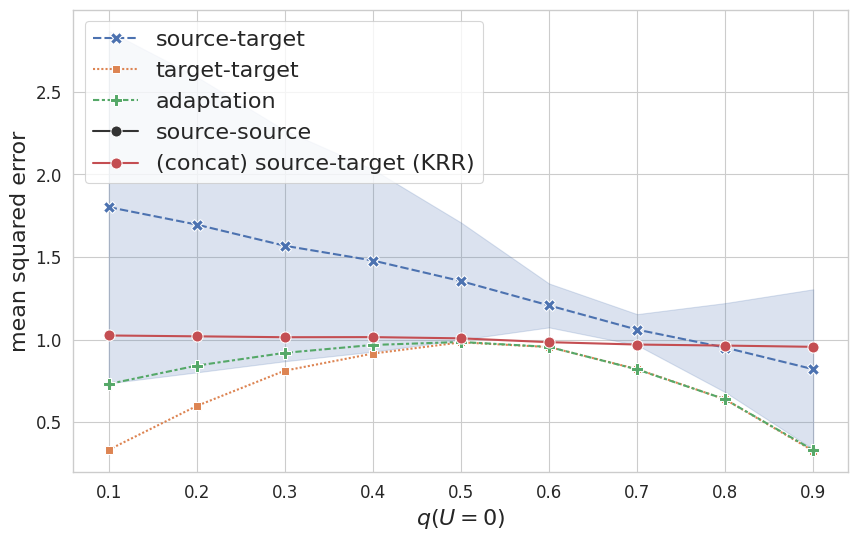

In [6]:
baseline = pd.read_csv('sweep_baseline_v2_v4_reversed.csv')
proposed = pd.read_csv('sweep_proposed_v2_reversed_fixscale_v4.csv')
baseline['approach'] = '(concat) source-target (KRR)'


sns.set(style="whitegrid")
sns.set_context("paper", rc={"lines.linewidth": 1.5})

# Create the line plot with error bars
plt.figure(figsize=(10, 6))


g = sns.lineplot(data=proposed.sort_values(by=['pU=0']), x='pU=0', y='predict error.l2', hue='task',
            hue_order=['source-target', 'target-target', 'adaptation'], style='task',
             markers=True, markersize=8)

sns.lineplot(data=baseline.sort_values(by=['pU=0']), x='pU=0', y='source -> target', hue='approach',
            hue_order=['(concat) source-target (KRR)'], style='approach', palette=['r'],
             markers=True, markersize=8)


plt.xlabel(r"$q(U=0)$", fontsize=16)
plt.ylabel('mean squared error', fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper left', fontsize=16)
plt.savefig('result_sim2_reverse.png')

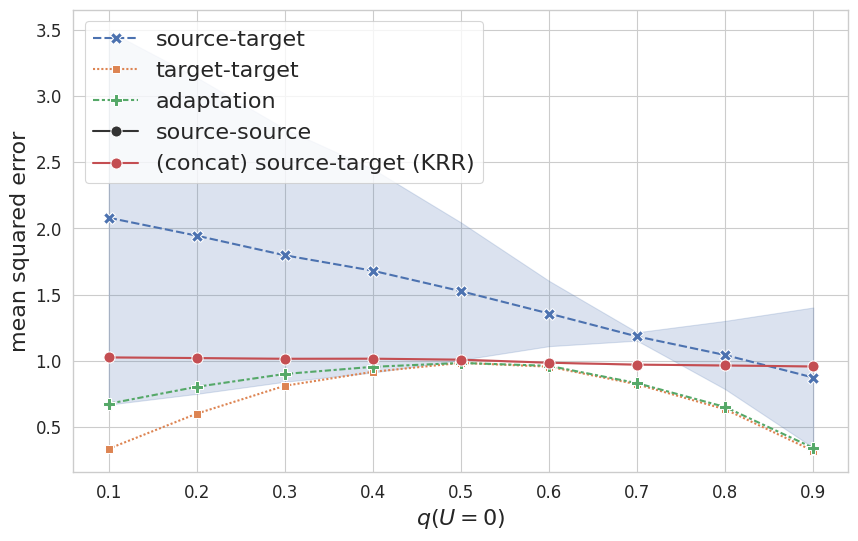

In [9]:
baseline = pd.read_csv('sweep_baseline_v2_v3_reversed.csv')
proposed = pd.read_csv('sweep_proposed_v2_fixscale.csv')
baseline['approach'] = '(concat) source-target (KRR)'


sns.set(style="whitegrid")
sns.set_context("paper", rc={"lines.linewidth": 1.5})

# Create the line plot with error bars
plt.figure(figsize=(10, 6))


g = sns.lineplot(data=proposed.sort_values(by=['pU=0']), x='pU=0', y='predict error.l2', hue='task',
            hue_order=['source-target', 'target-target', 'adaptation'], style='task',
             markers=True, markersize=8)

sns.lineplot(data=baseline.sort_values(by=['pU=0']), x='pU=0', y='source -> target', hue='approach',
            hue_order=['(concat) source-target (KRR)'], style='approach', palette=['r'],
             markers=True, markersize=8)


plt.xlabel(r"$q(U=0)$", fontsize=16)
plt.ylabel('mean squared error', fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper left', fontsize=16)
plt.savefig('result_sim2_reverse.png')